In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [2]:
data_frame = pd.read_csv("articulos_ml.csv")
data_frame.columns

Index(['Title', 'url', 'Word count', '# of Links', '# of comments',
       '# Images video', 'Elapsed days', '# Shares'],
      dtype='object')

In [3]:
data_frame.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [4]:
# Número de observaciones
data_frame.shape

(161, 8)

In [5]:
data_frame.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


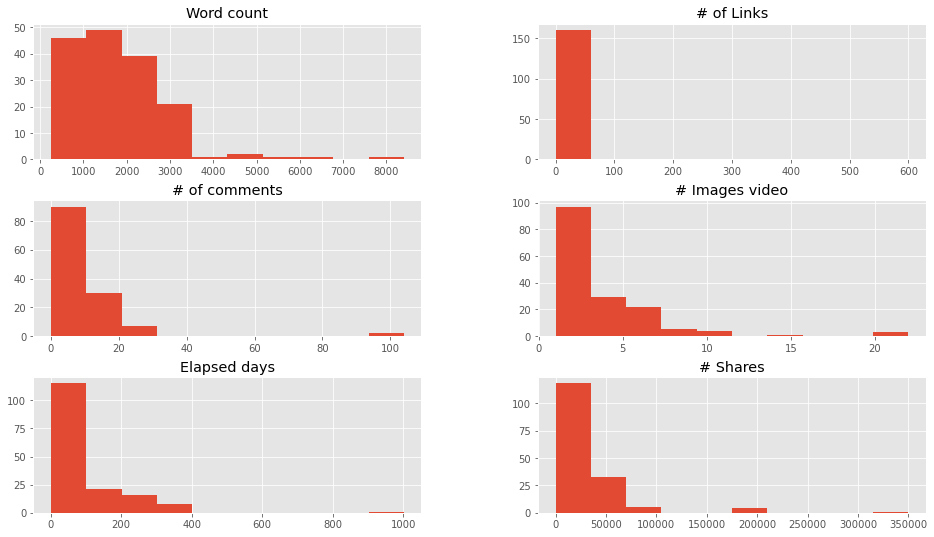

In [6]:
data_frame.drop(['Title','url'],1).hist()
plt.show()

In [7]:
# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000

filtered_data = data_frame[(data_frame['Word count'] <= 3500) & (data_frame['# Shares'] <= 80000)]

colores=['orange','blue']
tamanos=[30,60]
f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

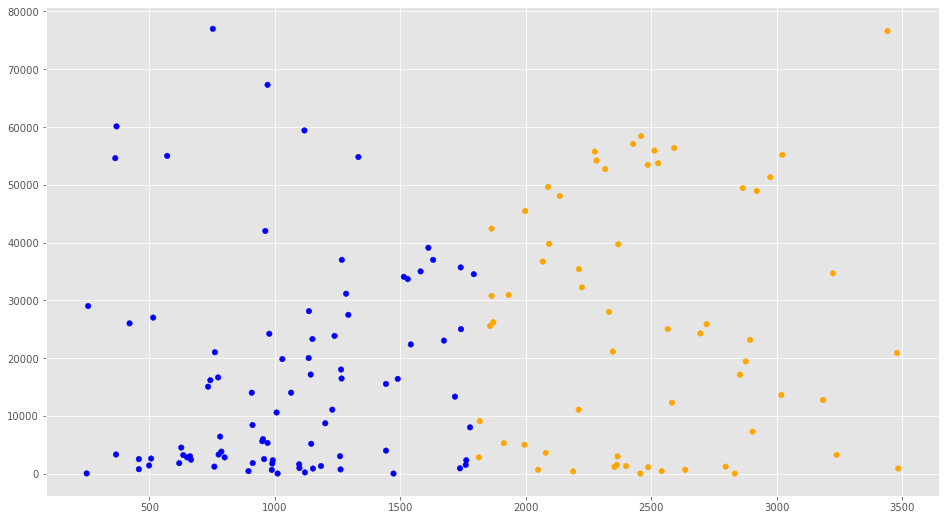

In [8]:
# Vamos a pintar en 2 colores los puntos por debajo de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanos[0])
plt.show()

In [9]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.

dataX =filtered_data[["Word count"]]
X = np.array(dataX)
y = filtered_data['# Shares'].values

In [10]:
#Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()

In [11]:
# Verificamos los shape
print("Shape of X", X.shape,"Shape of y", y.shape)

Shape of X (148, 1) Shape of y (148,)


In [12]:
from sklearn.model_selection import train_test_split
# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)

In [13]:
# Se entrena y se predice
# Se define el algoritmo a utilizar
modelo = linear_model.LinearRegression()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Se realiza la predicción
Y_pred = modelo.predict(X_test)

In [14]:
# Evaluación del modelo
print("Score del modelo: %.2f" % modelo.score(X_test, y_test))
print("Mean squared error: %.2f" % np.mean((Y_pred - y_test)**2))
print("Coeficiente de determinación: %.2f" % r2_score(y_test, Y_pred))

Score del modelo: -0.08
Mean squared error: 306380636.83
Coeficiente de determinación: -0.08


In [15]:
# Muestra los coeficientes de la ecuación de regresión
print("Coeficientes:",modelo.coef_)
print("Término independiente:", modelo.intercept_)

Coeficientes: [6.82629025]
Término independiente: 9820.167571966804


In [16]:
# Vamos a revisar la correlación entre las variables
data_frame.corr(method ='pearson')

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
Word count,1.000000,0.346730,0.108730,0.463767,-0.167361,0.141736
# of Links,0.346730,1.000000,0.116415,0.021087,0.059157,0.288325
# of comments,0.108730,0.116415,1.000000,0.018377,0.279116,0.437413
# Images video,0.463767,0.021087,0.018377,1.000000,0.209958,0.062170
Elapsed days,-0.167361,0.059157,0.279116,0.209958,1.000000,0.325343
# Shares,0.141736,0.288325,0.437413,0.062170,0.325343,1.000000


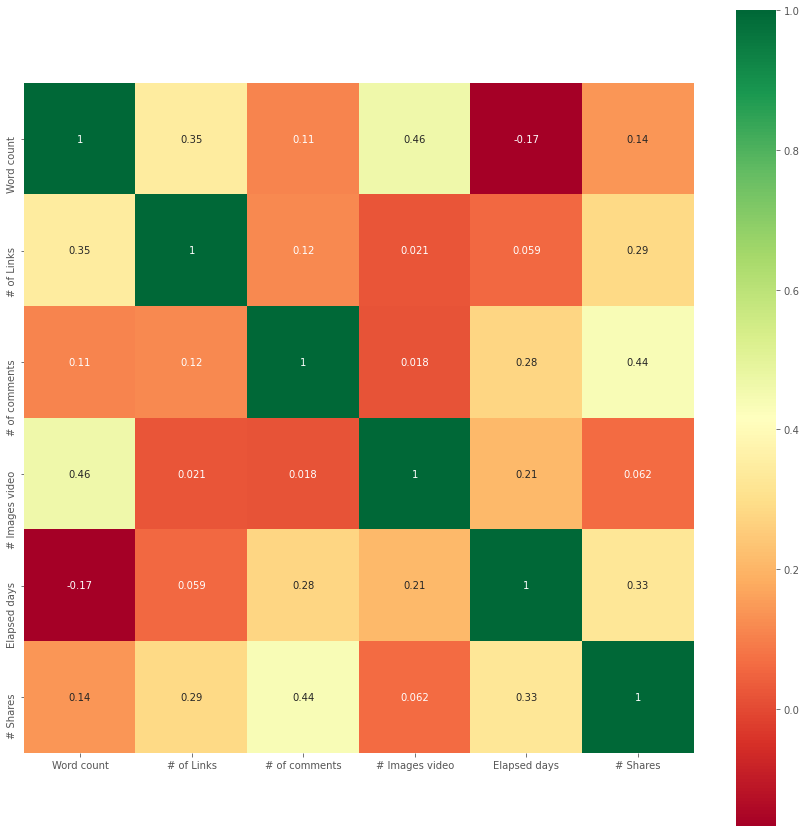

In [17]:
## Correlación de las variables
plt.figure(figsize=(15,15))
p=sb.heatmap(data_frame.corr(method="pearson"), annot=True,cmap='RdYlGn',square=True)

In [21]:
filtered_data = data_frame[(data_frame['# of comments'] <= 40) & (data_frame['# Shares'] <= 80000)]
X = filtered_data[["# of comments"]]
y = filtered_data['# Shares'].values

In [22]:
# Verificamos los shape
print("Shape of X", X.shape,"Shpae of y", y.shape)

Shape of X (123, 1) Shpae of y (123,)


In [23]:
from sklearn.model_selection import train_test_split
# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)

In [24]:
# Se entrena y se predice
# Se define el algoritmo a utilizar
modelo = linear_model.LinearRegression()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Se realiza la predicción
Y_pred = modelo.predict(X_test)

In [25]:
# Evaluación del modelo
print("Score del modelo: %.2f" % modelo.score(X_test, y_test))
print("Mean squared error: %.2f" % np.mean((Y_pred - y_test)**2))
print("Coeficiente de determinación: %.2f" % r2_score(y_test, Y_pred))

Score del modelo: -0.06
Mean squared error: 461006422.93
Coeficiente de determinación: -0.06


In [26]:
# Muestra los coeficientes de la ecuación de regresión
print("Coeficientes:",modelo.coef_)
print("Término independiente:", modelo.intercept_)

Coeficientes: [-161.75757695]
Término independiente: 20269.299019055135


REGRESION LINEAL MULTIPLE

In [27]:
filtered_data = data_frame[(data_frame['# of comments'] <= 30) & (data_frame['Elapsed days'] <= 400) & (data_frame['Word count'] <= 3500) & (data_frame['# of Links'] <= 10) & (data_frame['# Images video'] <= 15 ) & (data_frame['# Shares'] <= 80000)]
filtered_data['# of comments'].fillna(filtered_data['# of comments'].mean(), inplace = True)
X = filtered_data[["# of comments",'Elapsed days']]
y = filtered_data['# Shares'].values

D:\ProgramasOP\Anaconda\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [28]:
# Verificamos los shape
print("Shape of X", X.shape,"Shpae of y", y.shape)

Shape of X (115, 2) Shpae of y (115,)


In [29]:
from sklearn.model_selection import train_test_split
# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)

In [30]:
# Se entrena y se predice
# Se define el algoritmo a utilizar
modelo = linear_model.LinearRegression()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Se realiza la predicción
Y_pred = modelo.predict(X_test)

In [31]:
# Evaluación del modelo
print("Score del modelo: %.2f" % modelo.score(X_test, y_test))
print("Mean squared error: %.2f" % np.mean((Y_pred - y_test)**2))
print("Coeficiente de determinación: %.2f" % r2_score(y_test, Y_pred))

Score del modelo: -0.33
Mean squared error: 361906023.71
Coeficiente de determinación: -0.33


In [32]:
# Muestra los coeficientes de la ecuación de regresión
print("Coeficientes:",modelo.coef_)
print("Término independiente:", modelo.intercept_)

Coeficientes: [  16.10840028 -111.619268  ]
Término independiente: 29865.0052524428
